In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
from sklearn.manifold import TSNE
from sklearn.feature_extraction.text import TfidfVectorizer

In [2]:
# Load patents
path = "../data"
file = "netto_list_descriptions_2015-2020.txt"
with open(Path(path)/file, 'r') as file:
    corpus = file.read().split("\n\n")
print(corpus[1])

This invention is concerned with ion-exchange resins which are capable of very selective removal of heavy metal ions from aqueous solutions and methods for the synthesis of these resins. The resins of the invention are designed to selectively chelate mercury and copper ions and are particularly useful where the concentration of metal is-low. They have a further advantage that the metal can be recovered easily from the resins under appropriate conditions.
Use of, ion-exchange resins for the removal of metal ions from aqueous solutions is commercially wide spread; especially in water softening applications and for the removal of toxic products from effluents. Other areas of importance are in the processing of radioactive wastes and the purification of rare earth metals. Many of these commercial ion-exchange resins do have some selectivity for certain metal ions but as this is usually only by a factor of 2 or 3 it is not often of economic significance.
In an effort to improve this. select

In [3]:
# Tokenize documents and calculate tf-idf scores
tfidf_vectorizer = TfidfVectorizer(analyzer="word", stop_words="english")
v_tfidf = tfidf_vectorizer.fit_transform(corpus)
vocabulary = tfidf_vectorizer.get_feature_names_out()

In [4]:
# Print terms with highest tf-idf score per document
def top_tfidfs(v, k):
    return vocabulary[v.indices[np.argsort(v.data)[:-(k+1):-1]]]
    
for i in range(10):
    print(100 * '.')
    print(corpus[i][:400] + "...")
    print("Top tf-idf terms:", top_tfidfs(v_tfidf[i], 5))
    

....................................................................................................
The invention is concerned with novel resinous binders containing tertiary amino groups which are useful for coating articles by means of cathodic electrodeposition. The present invention is also concerned with the preparation of such binders as well as coating compositions containing them.
It is known to coat electrically conducting articles with resinous binders containing tertiary amino groups ...
Top tf-idf terms: ['resinous' 'meq' 'binder' '070874005' 'binders']
....................................................................................................
This invention is concerned with ion-exchange resins which are capable of very selective removal of heavy metal ions from aqueous solutions and methods for the synthesis of these resins. The resins of the invention are designed to selectively chelate mercury and copper ions and are particularly useful where the concentration

In [5]:
# Embed tf-idf vectors in two dimensions with t-SNE
tsne_embedder = TSNE(n_components=2, init="random", learning_rate="auto")
v_tsne = tsne_embedder.fit_transform(v_tfidf)

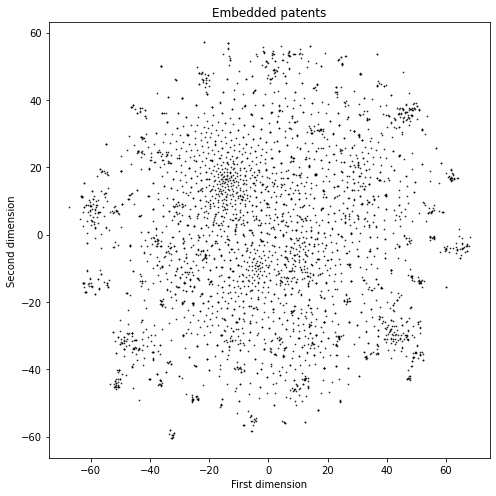

In [6]:
# Plot embedded documents
plt.figure(figsize=(7, 7))
plt.scatter(v_tsne[:, 0], v_tsne[:, 1], s=0.5, alpha=0.8, c='k')
plt.title("Embedded patents")
plt.xlabel("First dimension")
plt.ylabel("Second dimension")
plt.tight_layout()
plt.show()